In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w_opt = np.linalg.inv(tx.T.dot(tx)).dot(tx.T).dot(y)
    #w_opt = np.linalg.solve(tx,y)
    e = y - tx.dot(w_opt)
    mse = 1/(2*np.shape(tx)[0]) * e.dot(e.T)
    
    return mse, w_opt

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
import sys
sys.path.append('../..')
import ml_lib.ml_lib as lib
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    mse_ls, w_opt_ls = least_squares(y,tx)
   
    max_iters = 50
    gamma = 0.7
    # Initialization
    w_initial = np.array([0, 0])
    
    mse_gd, w_opt_gd = lib.gradient_descent(y, tx, w_initial, max_iters, gamma)
    print("GD: ", w_opt_gd)
    print("LS: ", w_opt_ls)

Test it here

In [4]:
test_your_least_squares()

Gradient Descent(0/49): loss=2792.236712759167, w0=51.305745401473644, w1=9.435798704492269
Gradient Descent(1/49): loss=265.3024621089598, w0=66.69746902191571, w1=12.266538315840005
Gradient Descent(2/49): loss=37.87837955044127, w0=71.31498610804834, w1=13.115760199244333
Gradient Descent(3/49): loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450459, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638307, w0=73.29348920882515, w1=13.47963283863509
Gradient Descent(10/49): loss=15.385887965652202, w0=73.29379216412117, w1=13.

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [6]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    phi = np.zeros((x.shape[0], degree+1))
    for i in range(0,x.shape[0]):
        for j in range(0,degree+1):
            phi[i,j] = x[i]**j
    return phi


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [7]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        phi = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse_ls, weights = least_squares(y,phi)
        rmse = np.sqrt(2*mse_ls)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773749
Processing 3th experiment, degree=7, rmse=0.2496587036090856
Processing 4th experiment, degree=12, rmse=1.4371532823068758


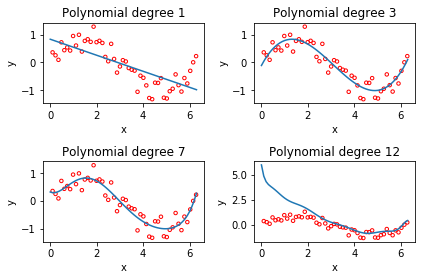

In [8]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [9]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    temp = np.random.rand(x.shape[0])
    ind = np.argsort(temp)
    
    lim = int(np.floor(ratio*x.shape[0]))
    x_train = np.zeros(lim)
    y_train = np.zeros(lim)
    x_test = np.zeros(x.shape[0]-lim)
    y_test = np.zeros(x.shape[0]-lim)

    for i in range(0,lim):
        x_train[i] = x[ind[i]]
        y_train[i] = y[ind[i]]
        
    for j in range(lim,x.shape[0]):
        x_test[j-lim] = x[ind[j]]
        y_test[j-lim] = y[ind[j]]   
        
    return x_train, y_train, x_test, y_test
split_data(x,y,0.8,1)

(array([ 1.86662437,  5.02131076,  1.61424946,  5.77843549,  4.01181111,
         0.73093728,  2.24518674,  3.7594362 ,  5.14749821,  0.47856237,
         3.38087384,  4.26418602,  3.88562366,  2.87612401,  0.85712473,
         3.12849893,  2.74993656,  4.13799857,  3.50706129,  1.10949964,
         3.00231147,  5.65224803,  6.28318531,  0.35237491,  6.15699785,
         0.60474982,  1.99281183,  3.25468638,  4.64274839,  2.37137419,
         6.0308104 ,  5.39987312,  3.63324875,  0.22618746,  4.39037348,
         0.1       ,  4.8951233 ,  4.76893584,  5.52606058,  1.74043692]),
 array([  1.28930361e+00,  -1.30763072e+00,   8.33364051e-01,
         -5.68519390e-01,  -5.59911457e-01,   5.38669461e-01,
          7.00138842e-01,  -1.06662741e+00,  -1.04670162e+00,
          7.22554859e-01,  -2.06807030e-01,  -1.29168955e+00,
         -4.84226326e-01,  -3.72595292e-01,   4.25144932e-01,
          7.69121860e-02,   1.21879684e-01,  -8.35127298e-01,
         -2.68157012e-01,   6.05998553e-01

Then, test your `split_data` function below.

In [10]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    mse_train, weights = least_squares(y_train,phi_train)
    rmse_tr = np.sqrt(2*mse_train)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_te = np.sqrt(2*lib.compute_loss(y_test, phi_test, weights))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [11]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.478, Testing RMSE=0.424
proportion=0.9, degree=3, Training RMSE=0.263, Testing RMSE=0.226
proportion=0.9, degree=7, Training RMSE=0.249, Testing RMSE=0.286
proportion=0.9, degree=12, Training RMSE=1.189, Testing RMSE=1.535
proportion=0.5, degree=1, Training RMSE=0.450, Testing RMSE=0.512
proportion=0.5, degree=3, Training RMSE=0.219, Testing RMSE=0.344
proportion=0.5, degree=7, Training RMSE=0.205, Testing RMSE=0.587
proportion=0.5, degree=12, Training RMSE=0.257, Testing RMSE=1.863
proportion=0.1, degree=1, Training RMSE=0.101, Testing RMSE=0.698
proportion=0.1, degree=3, Training RMSE=0.057, Testing RMSE=31.909
proportion=0.1, degree=7, Training RMSE=0.148, Testing RMSE=165.817
proportion=0.1, degree=12, Training RMSE=3.054, Testing RMSE=1022.443


# 3 Ridge Regression
Please fill in the function below.

In [12]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************

    L = np.eye(tx.shape[1])*lambda_
    weights= np.linalg.inv(tx.T.dot(tx) + L.T.dot(L)).dot(tx.T).dot(y)
    loss = lib.compute_loss(y,tx,weights)
    
    return weights, loss

In [13]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
    
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        weights, mse_tr = ridge_regression(y_train, phi_train, lambda_)
        rmse_tr.append(np.sqrt(2*mse_tr))
        mse_te = lib.compute_loss(y_test,phi_test,weights)
        rmse_te.append(np.sqrt(2*mse_te))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.243, Testing RMSE=0.296
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.243, Testing RMSE=0.296
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.243, Testing RMSE=0.296
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.243, Testing RMSE=0.296
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.243, Testing RMSE=0.296
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.243, Testing RMSE=0.296
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.243, Testing RMSE=0.295
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.243, Testing RMSE=0.295
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.243, Testing RMSE=0.293
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.243, Testing RMSE=0.283
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.247, Testing RMSE=0.265
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.252, Testing RMSE=0.256
proportion=0.5, degree=7, lambda=0.193, 

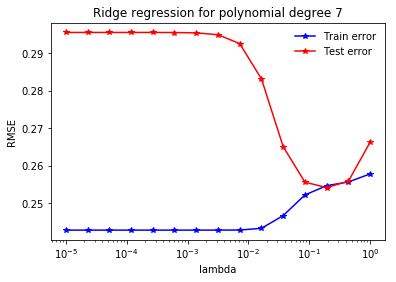

In [14]:
seed = 9 #9
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)